In [10]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
# Nuclear mass parabola for given A
A = 156

u = 931.49432 # MeV/c^2
m_p = 1.007825031898 * u
m_n = 1.008644904 * u

Z = input("Atomic number: ")
print(Z, ',', A)

100 , 156


# $\beta^{\mp}$-Decay Nuclear Mass Parabola:

Lower $Z$ - $\beta^-$-Decay

Higher $Z$ - $\beta^+$-Decay

Bethe-Weizsäcker mass formula:$$M(Z, N) = Zm_p + Nm_n - a_vA + a_sA^{2/3} + a_c\frac{Z(Z-1)}{A^{1/3}} + a_a\frac{(N-Z)^2}{A} + \delta$$
where $m_p$ and $m_n$ are the proton and neutron masses, $A = Z + N$ is the mass number, and $Z$ and $N$ are the proton and neutron numbers. The coefficients $a_v$, $a_s$, $a_c$, and $a_a$ are the volume, surface, Coulomb, and asymmetry coefficients, and $\delta$ is the pairing term, given by $$\delta(A,Z)=\begin{cases}+\delta_0&\mathrm{even-even\,(even\,A)}\\0&\mathrm{odd\,A}\\-\delta_0&\mathrm{odd-odd}\end{cases}$$

In [11]:
a_v, a_s, a_c, a_a = 15.75, 17.8, 0.711, 23.7
delta = 11.18

def get_mass_deficit(A, Z):
    N = A - Z

    sgn = np.zeros(Z.shape)
    sgn[(Z % 2) & (N % 2)] = -1
    sgn[~(Z % 2) & ~(N % 2)] = +1

    E = (a_v * A - a_s * A ** (2 / 3) - a_c * Z ** 2 / A ** (1 / 3) -
         a_a * (A - 2 * Z) ** 2 / A + sgn * delta / A ** (1 / 2))
    
    mass_deficit = Z * m_p + (A - Z) * m_n - A * u - E

    return mass_deficit

def most_stable_Z(A):
    Z = (4 * a_a - (m_p - m_n)) / (2 * A ** (-1 / 3) * (a_c + 4 * a_a * A ** (-2 / 3)))
    return round(Z)

In [12]:
strip_hash_and_keV_to_MeV = lambda s: float(s.replace('#','')) / 1000

df = pd.read_fwf('..\Outputs\mass.mas03.csv', usecols = (2, 3, 4, 6, 9, 10),
              names = ('N', 'Z', 'A', 'symbol', 'mass_excess', 'mass_excess_unc',
                  ),
              converters = {'symbol': str,
                          'mass_excess': strip_hash_and_keV_to_MeV,
                          'mass_excess_unc': strip_hash_and_keV_to_MeV},
              widths = (1, 3, 5, 5, 5, 1, 3, 4, 1, 13, 11, 11, 9, 1, 2, 11, 9, 1, 3, 1, 12, 11, 1),
              header = 39,
              index_col = False)

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\DELL\AppData\Local\Temp\ipykernel_6736\3538542515.py:3: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_fwf('..\Outputs\mass.mas03.csv', usecols = (2, 3, 4, 6, 9, 10),


Source: https://www.oecd-nea.org/dbdata/data/mass-evals2003/mass.mas03

A = 156
Predicted most stable Z_0 = 65 (Tb)


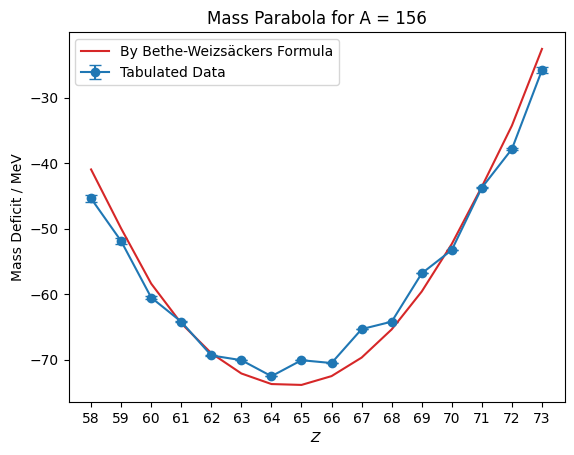

In [13]:
def get_dfA(A):
    
    dfA = df[df['A'] == A]
    return dfA

def plot_mass_parabola(A):
    dfA = get_dfA(A)
    fig, ax = plt.subplots()
    
    ax.errorbar(dfA['Z'], dfA['mass_excess'], dfA['mass_excess_unc'], marker = 'o', capsize = 4, label = 'Tabulated Data')
    SEMF_mass_excess = get_mass_deficit(A, dfA['Z'])
    
    ax.plot(dfA['Z'], SEMF_mass_excess, c = 'tab:red', label = 'By Bethe-Weizsäckers Formula')
    ax.set_xticks(dfA['Z'])

    ax.set_title(f'Mass Parabola for A = {A}')
    xticklabels = dfA['Z'].values

    ax.set_xticklabels(xticklabels)
    ax.set_xlabel(r'$Z$')
    ax.set_ylabel(r'Mass Deficit / MeV')
    ax.legend()

stable_Z = most_stable_Z(A)
stable_symbol = df[(df['A'] == A) & (df['Z'] == stable_Z)].iloc[0]['symbol']

print(f'A = {A}')
print(fr'Predicted most stable Z_0 = {stable_Z} ({stable_symbol})')

plot_mass_parabola(A)